<a href="https://colab.research.google.com/github/theirfanrahman/Time_Series_Forecasting_ARIMA_-_SARIMA_Model/blob/master/Time_Series_Forecasting_ARIMA_%26_SARIMA_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting using Arima Model And SARMIAX

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

## Reading data from CSV

In [4]:
df = pd.read_csv("/content/drive/My Drive/Sales.csv", sep='\t')
df.head()

,Month,Perrin Freres monthly champagne sales millions ’64-’72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


## Descriptive Analysis

In [5]:
df.describe()

,Perrin Freres monthly champagne sales millions ’64-’72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Month                                                   105 non-null    object
 1   Perrin Freres monthly champagne sales millions ’64-’72  105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB



*   Month column is in string object which needs to be converted into datatime object
*   Perrin Freres monthly champagne sales millions ’64-’72 column needs to change to Sales column
*   index columns needs to be deleted





In [7]:
df.columns = ['Month', 'Sales']
df.columns

Index(['Month', 'Sales'], dtype='object')

In [8]:
df['Month'] = pd.to_datetime(df['Month'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.8 KB


In [10]:
df.set_index('Month', inplace=True)

## Data Visualization

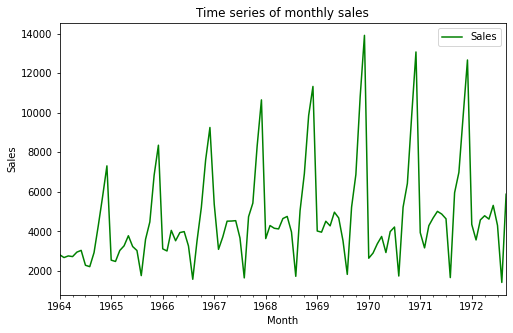

In [11]:
df.plot(figsize=(8, 5), color= 'green')
plt.legend()
plt.ylabel('Sales')
plt.title('Time series of monthly sales')
plt.show()

We can see that there seems to be seasonality in data. Sales also increasing higher and higher every month.

Now  we have to check the series is stationary or not. We can easily check the stationarity by using the rolling mean as well as using the Dicky Fuller hypothesis test.

## Hypothesis testing for Stationary
mean, variance, and covariance is constant over

We are going to perform Dicky fuller test. This test assumes that non-stationary is null-hypothesis. If the test statistic is less than the critical value then the null is rejected and the series is staitonary, else the series is non statonary and we need to use transformations to make the series stationary

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [13]:
def stationary_test(sales):
    rs=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','No of Lags Used','Number of Observations Used']
    for value,label in zip(rs,labels):
        print(label+' : '+str(value) )
    if rs[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Series is stationary")
    else:
        print("Not enough evidence to reject Null hypothesis, Series is non-stationary ")

In [14]:
stationary_test(df.Sales)

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
No of Lags Used : 11
Number of Observations Used : 93
Not enough evidence to reject Null hypothesis, Series is non-stationary 


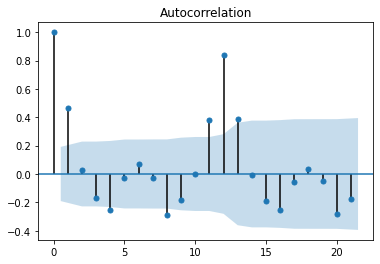

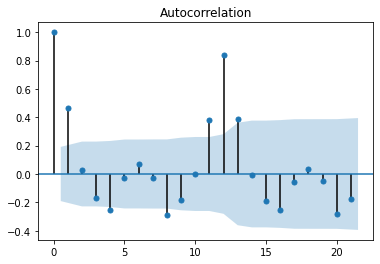

In [15]:
plot_acf(df)

As we can see series is non-stationary. Now we have convert it into stationary.

Also if you see the above plots when tha time lag 0 the correlation is 1 but when the lag is 1 the correlation should be 0 or negative but we can see clearly it is around 5 i.e. series is non-stationary.

## Coverting into Stationary

#### Differencing

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [17]:
df_diff = df.diff(periods=1)
df_diff.head()

,Sales
Month,
1964-01-01,NaN
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0


In [18]:
df_diff = df_diff[1:]
df_diff.head()

,Sales
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0


In [19]:
stationary_test(df_diff['Sales'])

ADF Test Statistic : -7.189896448050998
p-value : 2.519620447387099e-10
No of Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Series is stationary


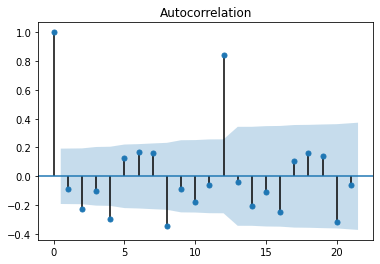

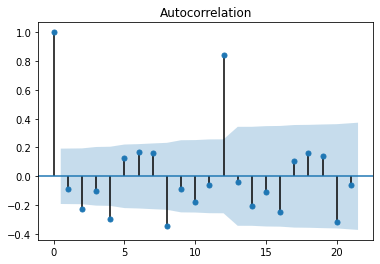

In [20]:
plot_acf(df_diff)

Autocorrelation says series is now stationary

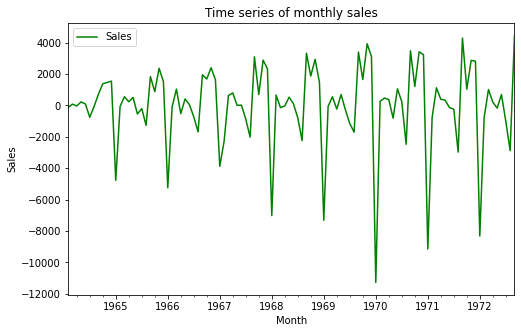

In [21]:
df_diff.plot(figsize=(8, 5), color= 'green')
plt.legend()
plt.ylabel('Sales')
plt.title('Time series of monthly sales')
plt.show()

Now there is no trend which means our series stationary.

In [22]:
X = df.values
train = X[:91]
test = X[91:]

In [23]:
model_arima = ARIMA(train, order=(1,1,1))
model_arima_fit = model_arima.fit()

In [24]:
pred = model_arima_fit.predict(start=90,end=103)

In [25]:
test

array([[ 1659],
       [ 5951],
       [ 6981],
       [ 9851],
       [12670],
       [ 4348],
       [ 3564],
       [ 4577],
       [ 4788],
       [ 4618],
       [ 5312],
       [ 4298],
       [ 1413],
       [ 5877]])

In [26]:
pred

array([571.72044812, 720.78732053, 335.18160107, 163.94016689,
        87.89453971,  54.12387293,  39.12685105,  32.46690954,
        29.50933429,  28.19592164,  27.61265574,  27.35363653,
        27.23861018,  27.18752878])

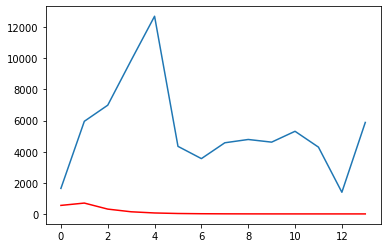

In [27]:
plt.plot(test)
plt.plot(pred, color='red')

As you can see above Arima model doesn't work with the series have seasonality, Now we will try SARIMA model

In [34]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


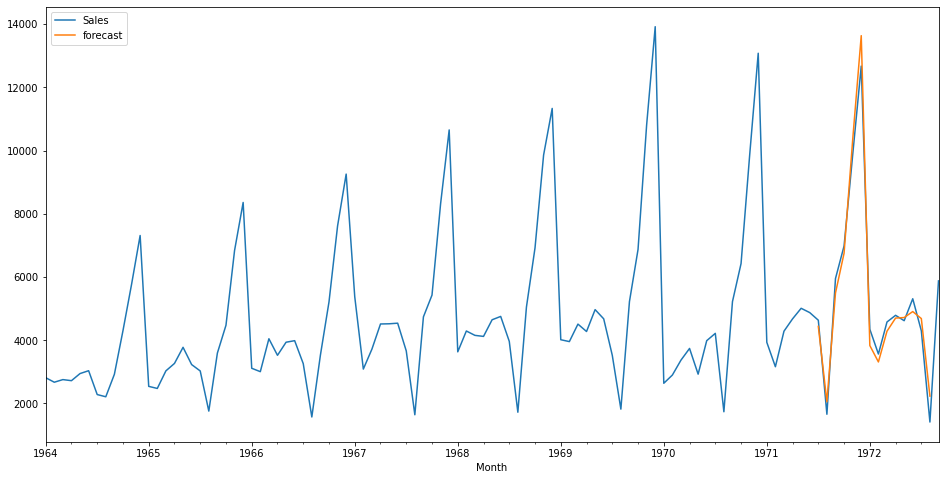

In [35]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(16,8))

In [30]:
df.tail()

,Sales,forecast
Month,,
1972-05-01,4618,5373.079816
1972-06-01,5312,5239.535207
1972-07-01,4298,5040.078000
1972-08-01,1413,2488.193332
1972-09-01,5877,NaN


SARIMA giving very good forecasting for seasonal series 

Now we will predict next 1 year sales

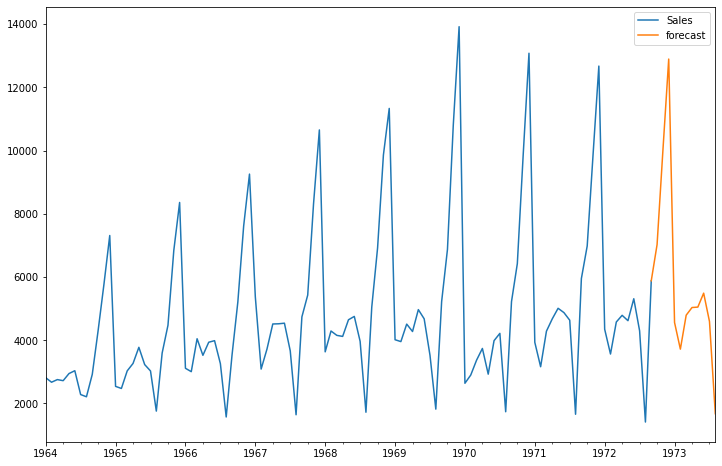

In [37]:
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,12)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 115, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))